# Introduction to Neural Networks


** Ecole Centrale Nantes **

** Diana Mateus **


** Participants : **
### So Onishi


## General description
In this lab we will create a simple classifier based on neural networks. We will progress in two parts:
- In the first part, and to better understand the involved operations, we will create a single-neuron model and optimize its parameters "by hand". For this first part we will only use the **Numpy** library
- We will then build a CNN with the built-in **Keras** module from **tensorflow**. Tensorflow is already installed in the university computers. If using your own computer you should have already installed **tensorflow** or use **collab** online platform.




In [5]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

### Loading the dataset
Start by runing the following lines to load and visualize the data.

In [ ]:
# UNCOMMENT IF USING COLAB
#from google.colab import drive
#drive.mount('/content/drive')
#IMDIR = '/content/drive/MyDrive/Colab Notebooks/2022-2023 Machine Learning/05-neural networks/'

In [38]:
def load_dataset(IMDIR):
    train_dataset = h5py.File(IMDIR+'dataset/train_catvnoncat.h5', "r")
    train_x = np.array(train_dataset["train_set_x"][:]) # access data set named "train_set_x" in HDF5, [:] means we can access all data in HDF5 as array(配列)
    train_y = np.array(train_dataset["train_set_y"][:])

    # for check value
    # print(f"Train X:\n{train_x}")
    # print(f"Train Y:\n{train_y}")

    test_dataset = h5py.File(IMDIR+'dataset/test_catvnoncat.h5', "r")
    test_x = np.array(test_dataset["test_set_x"][:])
    test_y = np.array(test_dataset["test_set_y"][:])
    classes = np.array(test_dataset["list_classes"][:])

    # print(f"Before:\n{train_y}")
    train_y = train_y.reshape((1, train_y.shape[0])) # change dimension from 1 to 2 (次元を２にしている) -> suitable for machine learning flame work
    # print(f"After:\n{train_y}")
    test_y = test_y.reshape((1, test_y.shape[0]))

    return train_x, train_y, test_x, test_y, classes

# print("-------- Before Setting --------")
IMDIR = "./"
train_x, train_y, test_x, test_y, classes=load_dataset(IMDIR)

# print("-------- After Setting --------")
# print(f"Train X:\n{train_x}")
# print(f"Train Y:\n{train_y}")

#### Visualize data

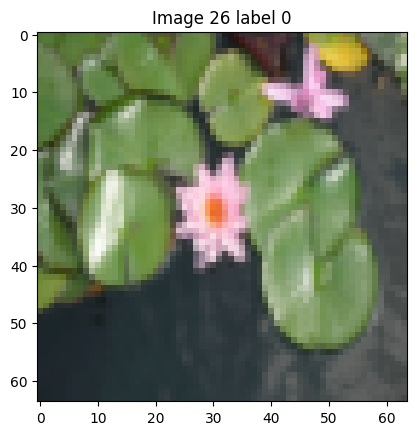

Train X shape: (209, 64, 64, 3)
We have 209 images of dimensionality 64x64x3


In [49]:
# run several times to visualize different data points
# the title shows the ground truth class labels (0=no cat , 1 = cat)
index = np.random.randint(low=0,high=train_y.shape[1])
plt.imshow(train_x[index])
plt.title("Image "+str(index)+" label "+str(train_y[0,index]))
plt.show()
print ("Train X shape: " + str(train_x.shape))
print ("We have "+str(train_x.shape[0]),
       "images of dimensionality "
       + str(train_x.shape[1])+ "x"
       + str(train_x.shape[2])+ "x"
       + str(train_x.shape[3]))

#### Preprocessing
In the following lines we vectorize the images (Instead of a 2-D image we will give as input to the models a 1-D vector). The normalization makes the image intensities be between 0 and 1, and converts the images to floats.

In [60]:
train_x, train_y, test_x, test_y, classes=load_dataset(IMDIR)
print ("Original train X shape: " + str(train_x.shape)) # reshape is which gives a new shape to an array without changing its data.
print ("Original test X shape: " + str(test_x.shape))
print(f"Train X Shape[0]:{train_x.shape[0]}\n")

train_x = train_x.reshape(train_x.shape[0], -1).T # "-1" means decide size of dimension automatically, .T change row and column
test_x = test_x.reshape(test_x.shape[0], -1).T
print ("Train X shape: " + str(train_x.shape))
print ("Train Y shape: " + str(train_y.shape))
print ("Test X shape: " + str(test_x.shape))
print ("Test Y shape: " + str(test_y.shape))

Original train X shape: (209, 64, 64, 3)
Original test X shape: (50, 64, 64, 3)
Train X Shape[0]:209

Train X shape: (12288, 209)
Train Y shape: (1, 209)
Test X shape: (12288, 50)
Test Y shape: (1, 50)


### Memo

- 元の`train_x`が`(画像数, 高さ, 幅, 色チャンネル)`の形状だった場合、`reshape(train_x.shape[0], -1)`によって形状が`(画像数, 高さ * 幅 * 色チャンネル)`になります。つまり、各画像は1次元のベクトルに変換されます。
- その後、`.T`によって形状が転置され、`(高さ * 幅 * 色チャンネル, 画像数)`になります。これにより、各列が1枚の画像データを表すようになります。

この変形は、ニューラルネットワークが画像を効率的に処理できる形状にデータを整えるために重要です。特に、多くのニューラルネットワークフレームワークは、各特徴が列に並んでいる2次元配列を入力として期待しています。

In [74]:
# The normalization makes the image intensities be between 0 and 1, and converts the images to floats.
print("----- Before Initialize -----\n","Train[1000][208]:",train_x[1000][208])
train_x = train_x/255. # Pixel value of image data represents 0 ~ 255
print("----- After Initialize -----\n", "Train[10000][208]:",train_x[1000][208], "\n")

test_x = test_x/255.

print(f"Train X:{train_x}")
print(f"Test Y:{test_y}")

print(f"\nClasses labels:{classes}")

----- Before Initialize -----
 Train[1000][208]: 1.4505291832260904e-25
----- After Initialize -----
 Train[10000][208]: 5.688349738141531e-28 

Train X:[[2.24888245e-28 2.59282918e-27 1.08475507e-27 ... 1.89170701e-27
  2.91031847e-28 1.05829763e-28]
 [4.10090330e-28 2.53991430e-27 9.39239143e-28 ... 2.05045165e-27
  3.17489288e-28 3.70404169e-28]
 [7.40808338e-28 2.51345686e-27 8.99552982e-28 ... 2.18273885e-27
  3.04260567e-28 7.01122177e-28]
 ...
 [0.00000000e+00 1.08475507e-27 1.82556340e-27 ... 1.12444123e-27
  5.29148813e-29 0.00000000e+00]
 [0.00000000e+00 1.05829763e-27 1.86524957e-27 ... 1.41547307e-27
  6.61436016e-29 0.00000000e+00]
 [0.00000000e+00 1.07152635e-27 1.87847829e-27 ... 1.97107933e-27
  0.00000000e+00 0.00000000e+00]]
Test Y:[[1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 0 1 0 1 1 1 1 0 0
  0 1 0 0 1 1 1 0 0 0 1 1 1 0]]

Classes labels:[b'non-cat' b'cat']


### 1. Classification with a single neuron


**a)** Fill-in the following three functions to define the single neuron model (a single neuron in the hidden layer):
- A function **initialize_parameters**, which given the number of desired weights ```dim```  it inizializes the neuron parameters.  
> The function will initialize:
> * the model's weights $\mathbf{w}$ by randomly, by sampling small values from a normal distribution (**Hint:** np.random.randn).
> * the bias $b$ with 0.
What is the number of weights required? pass this information as a parameter to the function.
- A function **sigmoid** that computes the sigmoid activation function
- A function **neuron** that given an input vector, the weights and bias, computes the output of the single neuron model

In [ ]:
def sigmoid(z):
    return

In [ ]:
def initialize_parameters(dim):
    w =
    b =
    return w, b

In [ ]:
def neuron(w,b,x):
    pred_y =
    return pred_y

**b)** **Forward Pass:**
Use the three functions above to compute a first forward pass for the input matrix $X$ containing the loaded dataset, for some initialization of the weights and bias.

 \begin{align}
 Y_{\rm pred}=\sigma(w^\top X+b) = [y_{\rm pred}^{(1)},y_{\rm pred}^{(2)},\dots,y_{\rm pred}^{(m)}]
 \end{align}


**c) Cost estimation:**

We will use a binary cross-entropy loss, so that the empirical risk can be computed as:
 \begin{align}
 E = - \frac{1}{m} \sum_{i=1}^m
 y^{(i)} \log(y_{\rm pred}^{(i)}) +
 (1-y^{(i)}) \log(1-y_{\rm pred}^{(i)})
 \end{align}

 The following cross-entropy function should give as result the **scalar** cost value computed over the entire dataset

In [ ]:
def crossentropy():

    cost = 0 #replace

    return cost

crossentropy(train_y,pred_y)

**d) Back propagation:**

After initializing the parameters and doing a forward pass, we need to backpropagate the cost by computing the gradient with respect to the model parameters to later update the weights

\begin{align}
\frac{\partial E}{\partial w} = \\
\frac{\partial E}{\partial b} =
\end{align}

See a demonstration of the gradient computation in
https://en.wikipedia.org/wiki/Cross_entropy

Fill-in the backpropagation function which receives as input the the training set (X,Y), as well as the current predictions and returns the gradients updates for the weights and bias

Hint: When the error is computed for several samples simultaneously, the gradient is averaged over the contribution of different samples.


In [ ]:
def backpropagate(X, Y, Ypred):
    m = X.shape[1]

    #find gradient (back propagation)
    dw =
    db =
    grads = {"dw": dw,
             "db": db}

    return grads



**e) Optimization**
After initializing the parameters, computing the cost function, and calculating gradients, we can now update the parameters using gradient descent. Use the functions implemented above to fill_in the "gradient_descent" function that optimizes the parameters given a training set X, Y, a fixed number of iterations, and a learning_rate. Store and plot the value of the loss function at each iteration

In [ ]:
def gradient_descent(X, Y, iterations, learning_rate):
    costs = []
    w, b = initialize_parameters(train_x.shape[0])

    for i in range(iterations):
        Ypred =
        cost =
        grads=

        #update parameters
        w =
        b =
        costs.append(cost)

        if i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

    return w,b, costs

w, b, costs = gradient_descent(train_x,train_y,iterations=2000, learning_rate = 0.005)

**f) Plot the training loss curve**
Plot the evolution of the loss against the iterations

In [ ]:
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations')
plt.show()

**g) Prediction**
Use the optimized parameters to make predictions both for the train and test sets and compute the accuracy for each. What do you observe?

In [ ]:
def predict(w, b, X):

    return y_pred

# predict
train_pred_y = predict(w, b, train_x)
test_pred_y = predict(w, b, test_x)
print("Train Acc: {} %".format(100 - np.mean(np.abs(train_pred_y - train_y)) * 100))
print("Test Acc: {} %".format(100 - np.mean(np.abs(test_pred_y - test_y)) * 100))


**h)Choose learning rate on a validation set** Use 10% of the training data as validation to choose the learning rate. What are the best results you can obtain? (use only the validation data to choose, buy repport the accuracy on the train and test data)
